In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [5]:
df = pd.read_csv(r"data\customer_churn_data.csv")

In [6]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [7]:
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

InternetService    29.7
CustomerID          0.0
Age                 0.0
Gender              0.0
Tenure              0.0
MonthlyCharges      0.0
ContractType        0.0
TotalCharges        0.0
TechSupport         0.0
Churn               0.0
dtype: float64

In [8]:
df["InternetService"] = df["InternetService"].fillna("-")

In [9]:
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

CustomerID         0.0
Age                0.0
Gender             0.0
Tenure             0.0
MonthlyCharges     0.0
ContractType       0.0
InternetService    0.0
TotalCharges       0.0
TechSupport        0.0
Churn              0.0
dtype: float64

In [28]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

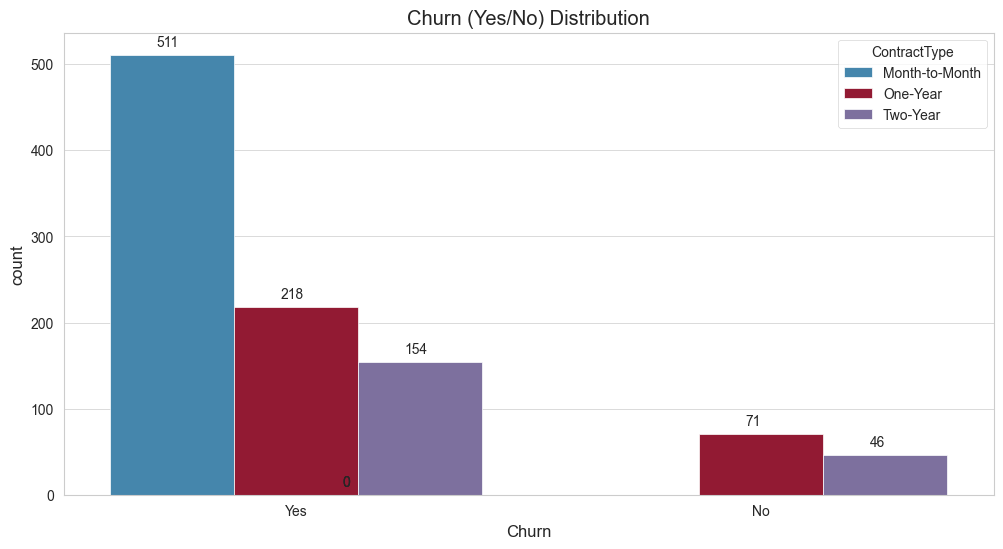

In [20]:
plt.figure(figsize=(12,6))
plt.title("Churn (Yes/No) Distribution")
sns.set_style('whitegrid')
ax=sns.countplot(x='Churn',data=df,hue='ContractType')
for p in ax.patches:
    ax.annotate('{:d}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+10))

In [66]:
y = df[["Churn"]]
X = df.drop(["Churn","CustomerID","InternetService"],axis=1)

In [67]:
X["Gender"]=X["Gender"].apply(lambda x: 1 if x =="Female" else 0)
X["TechSupport"]=X["TechSupport"].apply(lambda x: 1 if x =="Yes" else 0)
X["ContractType"] = X["ContractType"].map({
    "Month-to-Month": 1,
    "One-Year": 2,
    "Two-Year": 3
})


In [68]:
y["Churn"]=y["Churn"].apply(lambda x: 1 if x =="Yes" else 0)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)

In [74]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [76]:
X_test = scaler.transform(X_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def modelperformance(prediction):
    print("Accuracy Score: ", accuracy_score(y_test, prediction))
    print("\nConfusion Matrix\n", confusion_matrix(y_test, prediction))
    print("\nClassification Report\n", classification_report(y_test, prediction))

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_model = LogisticRegression()

In [86]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [89]:
y_pred = log_model.predict(X_test)

In [92]:
modelperformance(y_pred)

Accuracy Score:  0.915

Confusion Matrix
 [[ 11  14]
 [  3 172]]

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.44      0.56        25
           1       0.92      0.98      0.95       175

    accuracy                           0.92       200
   macro avg       0.86      0.71      0.76       200
weighted avg       0.91      0.92      0.90       200



In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

In [95]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)

In [96]:
gridkn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.963 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.931 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.969 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.938 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.963 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.956 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.925 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.975 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.944 tot

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [97]:
gridkn.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [98]:
y_pred = gridkn.predict(X_test)

In [99]:
modelperformance(y_pred)

Accuracy Score:  0.98

Confusion Matrix
 [[ 21   4]
 [  0 175]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.98      1.00      0.99       175

    accuracy                           0.98       200
   macro avg       0.99      0.92      0.95       200
weighted avg       0.98      0.98      0.98       200



In [100]:
joblib.dump(gridkn.best_params_, 'knn_model.pkl')

['knn_model.pkl']

In [101]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType',
       'TotalCharges', 'TechSupport'],
      dtype='object')